In [560]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import scipy.stats as stats
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [602]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

#train["SalePrice"] = np.log1p(train["SalePrice"])
#y = train.SalePrice.reset_index(drop=True)


full = train.append(test, ignore_index = True,sort=False)

# Initial observations

In [603]:
print(full.shape)
print(train.shape)
print(test.shape)

(2919, 80)
(1460, 80)
(1459, 79)


In [563]:
print(full.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

* there are some missing values in certain column like Alley , PoolQC , MiscFeature etc. 

In [564]:
full.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


* most of column have very different range of data .. may be later normalizing or logging will help
* certain column standout like BsmtFinSF2 where max and mean are very very for apart

In [565]:
focus_cols = ['SalePrice']
a= train.corr(method='spearman').filter(focus_cols).drop(focus_cols)
print(a.SalePrice>0.5)
print(a.SalePrice<-0.5)

MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual       True
OverallCond      False
YearBuilt         True
YearRemodAdd      True
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF       True
1stFlrSF          True
2ndFlrSF         False
LowQualFinSF     False
GrLivArea         True
BsmtFullBath     False
BsmtHalfBath     False
FullBath          True
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd      True
Fireplaces        True
GarageYrBlt       True
GarageCars        True
GarageArea        True
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
Name: SalePrice, dtype: bool
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearR

* certian variable(numerical) are very important like OverallQual , garage , area etc..

In [566]:
print("Numeric Features are :")

numeric_features = list(train.describe().columns)

print(numeric_features)
print("\n\n")


catfeature = ["MSSubClass","OverallQual","OverallCond"]
numeric_features= list(set(numeric_features).difference(set(catfeature)))

print("Catagorical FEatures are :")
Categorical_features = []
for x in train.columns:
    if x not in numeric_features:
        Categorical_features.append(x)

print(Categorical_features)

Numeric Features are :
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']



Catagorical FEatures are :
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'E

In [567]:
print("Numerical features with missing value are")
missing_numeric =[]
for x in numeric_features:
    if sum(np.isnan(full[x]))>0:
        missing_numeric.append(x)
        print(x)

Numerical features with missing value are
BsmtFullBath
BsmtHalfBath
GarageArea
BsmtUnfSF
MasVnrArea
GarageCars
LotFrontage
GarageYrBlt
BsmtFinSF1
BsmtFinSF2
TotalBsmtSF
SalePrice


* obve numerical column have missing columns
* we will try to understand them before imputing 

In [568]:
missing_numeric_df = full.filter(missing_numeric, axis=1)

missing_numeric_df.describe()

,BsmtFullBath,BsmtHalfBath,GarageArea,BsmtUnfSF,MasVnrArea,GarageCars,LotFrontage,GarageYrBlt,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2917.000000,2917.000000,2918.000000,2918.000000,2896.000000,2918.000000,2433.000000,2760.000000,2918.000000,2918.000000,2918.000000,1460.000000
mean,0.429894,0.061364,472.874572,560.772104,102.201312,1.766621,69.305795,1978.113406,441.423235,49.582248,1051.777587,180921.195890
std,0.524736,0.245687,215.394815,439.543659,179.334253,0.761624,23.344905,25.574285,455.610826,169.205611,440.766258,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,1895.000000,0.000000,0.000000,0.000000,34900.000000
25%,0.000000,0.000000,320.000000,220.000000,0.000000,1.000000,59.000000,1960.000000,0.000000,0.000000,793.000000,129975.000000
50%,0.000000,0.000000,480.000000,467.000000,0.000000,2.000000,68.000000,1979.000000,368.500000,0.000000,989.500000,163000.000000
75%,1.000000,0.000000,576.000000,805.500000,164.000000,2.000000,80.000000,2002.000000,733.000000,0.000000,1302.000000,214000.000000
max,3.000000,2.000000,1488.000000,2336.000000,1600.000000,5.000000,313.000000,2207.000000,5644.000000,1526.000000,6110.000000,755000.000000


In [569]:
missing_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
BsmtFullBath    2917 non-null float64
BsmtHalfBath    2917 non-null float64
GarageArea      2918 non-null float64
BsmtUnfSF       2918 non-null float64
MasVnrArea      2896 non-null float64
GarageCars      2918 non-null float64
LotFrontage     2433 non-null float64
GarageYrBlt     2760 non-null float64
BsmtFinSF1      2918 non-null float64
BsmtFinSF2      2918 non-null float64
TotalBsmtSF     2918 non-null float64
SalePrice       1460 non-null float64
dtypes: float64(12)
memory usage: 273.7 KB


In [570]:

#print("Numerical features without missing value are")
#non_missing_numeric =[]
#for x in numeric_features:
#    if sum(np.isnan(full[x]))==0:
#        non_missing_numeric.append(x)
#        print(x)


In [571]:
total = missing_numeric_df.isnull().sum().sort_values(ascending=False)


percent = (missing_numeric_df.isnull().sum()/missing_numeric_df.isnull().count()).sort_values(ascending=False)


missing_data1 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


missing_data1.head(20)

,Total,Percent
SalePrice,1459,0.499829
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
MasVnrArea,23,0.007879
BsmtHalfBath,2,0.000685
BsmtFullBath,2,0.000685
TotalBsmtSF,1,0.000343
BsmtFinSF2,1,0.000343
BsmtFinSF1,1,0.000343
GarageCars,1,0.000343


* sale price has only 1460 bcoz all test data set does not contain sale price value
* lot frontagate has lots of missing value so i am going to drop it


In [572]:
#p['LotFrontage'] = p.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
#print(p.describe())

#### before imputing other missing numerical value which are related to basement , garage and masonry we must analuze them with there partner catagorical variable

### Understanding Masonry veneer

In [573]:
p= full[full.MasVnrType == "None"]

print(p[['MasVnrArea','MasVnrType']].describe())
print("---------------------------------")

p= p[p.MasVnrArea > 280]
print(p[['MasVnrArea','MasVnrType']])

print("---------------------------------")
q = full[(full['MasVnrArea'] > 280) & (full['MasVnrArea'] <350)]
print(q['MasVnrType'].describe())


        MasVnrArea
count  1742.000000
mean      0.707233
std      14.753979
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max     344.000000
---------------------------------
      MasVnrArea MasVnrType
624        288.0       None
1300       344.0       None
1334       312.0       None
1669       285.0       None
---------------------------------
count         118
unique          4
top       BrkFace
freq           87
Name: MasVnrType, dtype: object


* **MasVnrArea is missing when MasVnrType is none** that means we will be **imputing missing value as 0**
* we can replace **MasVnrArea with BrkCmn** where its none as value missing is between 280 and 350 which has most case of BrkCmn

### Understanding Garagedata

In [574]:
gar = full.filter(regex='^Garage')
p = gar[gar['GarageType'].isnull()]
#p = gar.notna
#gar= [p]
print("----------------------------------")
print(p.columns)
print(p.describe())
print("----------------------------------")
p = p[['GarageType',  'GarageFinish', 'GarageQual', 'GarageCond']]
print(p.describe())

----------------------------------
Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')
       GarageYrBlt  GarageCars  GarageArea
count          0.0       157.0       157.0
mean           NaN         0.0         0.0
std            NaN         0.0         0.0
min            NaN         0.0         0.0
25%            NaN         0.0         0.0
50%            NaN         0.0         0.0
75%            NaN         0.0         0.0
max            NaN         0.0         0.0
----------------------------------
        GarageType  GarageFinish  GarageQual  GarageCond
count            0             0           0           0
unique           0             0           0           0


* when GarageType is null then all value are zero as garage is not present thus we will impute values with 0

### Understanding basement

In [575]:
gar = full.filter(regex='^Bsmt')
p = gar[gar['BsmtCond'].isnull()]
print("--------------------------------------------------------------------------")
print(p.columns)
print("--------------------------------------------------------------------------")
print(p.count())
print("--------------------------------------------------------------------------")
print(p.describe())
print("--------------------------------------------------------------------------")
print(p.head(10))
print("--------------------------------------------------------------------------")
p = p[['BsmtQual',  'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2']]
print(p.describe())
print(p.head())

--------------------------------------------------------------------------
Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath',
       'BsmtHalfBath'],
      dtype='object')
--------------------------------------------------------------------------
BsmtQual         3
BsmtCond         0
BsmtExposure     3
BsmtFinType1     3
BsmtFinSF1      81
BsmtFinType2     3
BsmtFinSF2      81
BsmtUnfSF       81
BsmtFullBath    80
BsmtHalfBath    80
dtype: int64
--------------------------------------------------------------------------
        BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  BsmtFullBath  BsmtHalfBath
count    81.000000   81.000000   81.000000     80.000000     80.000000
mean     34.962963    4.716049    4.123457      0.012500      0.012500
std     181.246893   42.444444   28.517268      0.111803      0.111803
min       0.000000    0.000000    0.000000      0.000000      0.000000
25%       0.000000    0.0000

* **numerical variabl**e are usaully NaN so we will be **replacing them with 0** as with execption of 3-4 entries all record with basement condition null
* **catagorical** varibale will be replaced with **missing**

In [576]:
full.drop(['LotFrontage'],axis=1,inplace = True) 


In [577]:

full.MasVnrArea = full.MasVnrArea.fillna(0.) 


full.GarageCars = full.GarageCars.fillna(0.) 
full.GarageArea = full.GarageArea.fillna(0.) 
full.GarageYrBlt = full.GarageYrBlt.fillna(0.)

full.BsmtFinSF1 = full.BsmtFinSF1.fillna(0.)
full.BsmtFinSF2 = full.BsmtFinSF2.fillna(0.)
full.BsmtUnfSF = full.BsmtUnfSF.fillna(0.)
full.BsmtFullBath = full.BsmtFullBath.fillna(0.)
full.BsmtHalfBath = full.BsmtHalfBath.fillna(0.)
full.TotalBsmtSF = full.TotalBsmtSF.fillna(0.)


### catagorical features

In [578]:
print("catagorical features with missing value are")
missing_catagorical =[]
for x in Categorical_features:
    if sum(pd.isnull(full[x]))>0:
        missing_catagorical.append(x)
        print(x)

catagorical features with missing value are
MSZoning
Alley
Utilities
Exterior1st
Exterior2nd
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
SaleType


* we have many missing column, we have already analyzed some column like basement and garage

In [579]:
#full.info()
missing_catagorical_df = full.filter(missing_catagorical, axis=1)

#missing_numeric_df = full[[numeric_features]]
missing_catagorical_df.describe()

,MSZoning,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
count,2915,198,2917,2918,2918,2895,2838,2837,2837,2840,...,2917,1499,2762,2760,2760,2760,10,571,105,2918
unique,5,2,2,15,16,4,4,4,4,6,...,7,5,6,3,5,5,3,4,4,9
top,RL,Grvl,AllPub,VinylSd,VinylSd,None,TA,TA,No,Unf,...,Typ,Gd,Attchd,Unf,TA,TA,Gd,MnPrv,Shed,WD
freq,2265,120,2916,1025,1014,1742,1283,2606,1904,851,...,2717,744,1723,1230,2604,2654,4,329,95,2525


In [580]:

percent = (missing_catagorical_df.isnull().sum()*100/missing_catagorical_df.isnull().count()).sort_values(ascending=False)

total = missing_catagorical_df.isnull().sum().sort_values(ascending=False)

missing_data1 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


missing_data1.head(40)

,Total,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
GarageCond,159,5.447071
GarageQual,159,5.447071
GarageFinish,159,5.447071
GarageType,157,5.378554
BsmtExposure,82,2.809181


* PoolQC , MiscFeature , Alley , Fence, FireplaceQu have many many missing valuw so we will drop them
* pool and fence  i belive have missing value as most house will not have pool or fence so we can create another boolean variable for their presence
* as analysed before all garage and basement variable are no garage or no basement so will be populated with missing


In [581]:
full.FireplaceQu.value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [582]:
full.drop(['PoolQC'],axis=1,inplace = True) 
full.drop(['MiscFeature'],axis=1,inplace = True) 
full.drop(['Alley'],axis=1,inplace = True)   
#full.drop(['Fence'],axis=1,inplace = True) 

* we dropped poolQc , MiscFeature  and  Alley  and fence may e droppe later but for now we will replace it with missing catagory

In [583]:
#want to replave 4 index MasVnrType with analysed value and remaining 20 with missing
#p = full[full.index == 624]
#print(p)
#full[''] = full[''].fillna(full[''].mode()[0])    


### Understanding remainig missing variable

In [584]:
p = train['MSZoning']
print(p.value_counts())
p = test['MSZoning']
print(p.value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


In [585]:
p = train['Functional']
print(p.value_counts())
p = test['Functional']
print(p.value_counts())

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64


In [586]:
p = train['Exterior1st']
print(p.value_counts())
p = test['Exterior1st']
print(p.value_counts())

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64


In [587]:
p = train['KitchenQual']
print(p.value_counts())
p = test['KitchenQual']
print(p.value_counts())

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64


In [588]:
p = train['SaleType']
print(p.value_counts())
p = test['SaleType']
print(p.value_counts())

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
WD       1258
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
ConLw       3
Con         3
Name: SaleType, dtype: int64


In [589]:
p = train['Electrical']
print(p.value_counts())
p = test['Electrical']
print(p.value_counts())

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64


In [590]:
p = train['Exterior2nd']
print(p.value_counts())
p = test['Exterior2nd']
print(p.value_counts())

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64


* for Functional document asked us to assume missing data as Typ so we will be replaceing missing data with Typ
* all above column has not very biased distribution nor mansy missing value so will be imputing mode in those columns
* as documented FireplaceQu missing value are basically no fireplace

In [591]:
#features['Electrical'] = features['Electrical'].fillna("SBrkr")

full['Electrical'] = full['Electrical'].fillna(full['Electrical'].mode()[0])  

full['SaleType'] = full['SaleType'].fillna(full['SaleType'].mode()[0]) 

full['MSZoning'] = full['MSZoning'].fillna(full['MSZoning'].mode()[0])  

full['KitchenQual'] = full['KitchenQual'].fillna(full['KitchenQual'].mode()[0]) 



full['MasVnrType'] = full['MasVnrType'].fillna('Missing')    

full['Exterior1st'] = full['Exterior1st'].fillna(full['Exterior1st'].mode()[0])
full['Exterior2nd'] = full['Exterior2nd'].fillna(full['Exterior2nd'].mode()[0])    

full['Fence'] = full['Fence'].fillna('Missing')
full['FireplaceQu'] = full['FireplaceQu'].fillna('Missing')

full['Functional'] = full['Functional'].fillna('Typ')

full['GarageType'] = full['GarageType'].fillna('Missing')
full['GarageFinish'] = full['GarageFinish'].fillna('Missing')
full['GarageQual'] = full['GarageQual'].fillna('Missing')
full['GarageCond'] = full['GarageCond'].fillna('Missing')


    
full['BsmtExposure'] = full['BsmtExposure'].fillna('Missing')
full['BsmtFinType1'] = full['BsmtFinType1'].fillna('Missing')
full['BsmtFinType2'] = full['BsmtFinType2'].fillna('Missing')
full['BsmtQual'] = full['BsmtQual'].fillna('Missing')
full['BsmtCond'] = full['BsmtCond'].fillna('Missing')




In [592]:
full.info()
#Functional       has two missing
#drop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 76 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 non-null object
MasVnrArea       2919 non

### outlier detection

In [593]:
train = full[full.SalePrice.notnull()]
numeric_features = list(train.describe().columns)

### numerical variable outlier
* we wil plot all numericalvariable with respect tot sale price to detect outliers

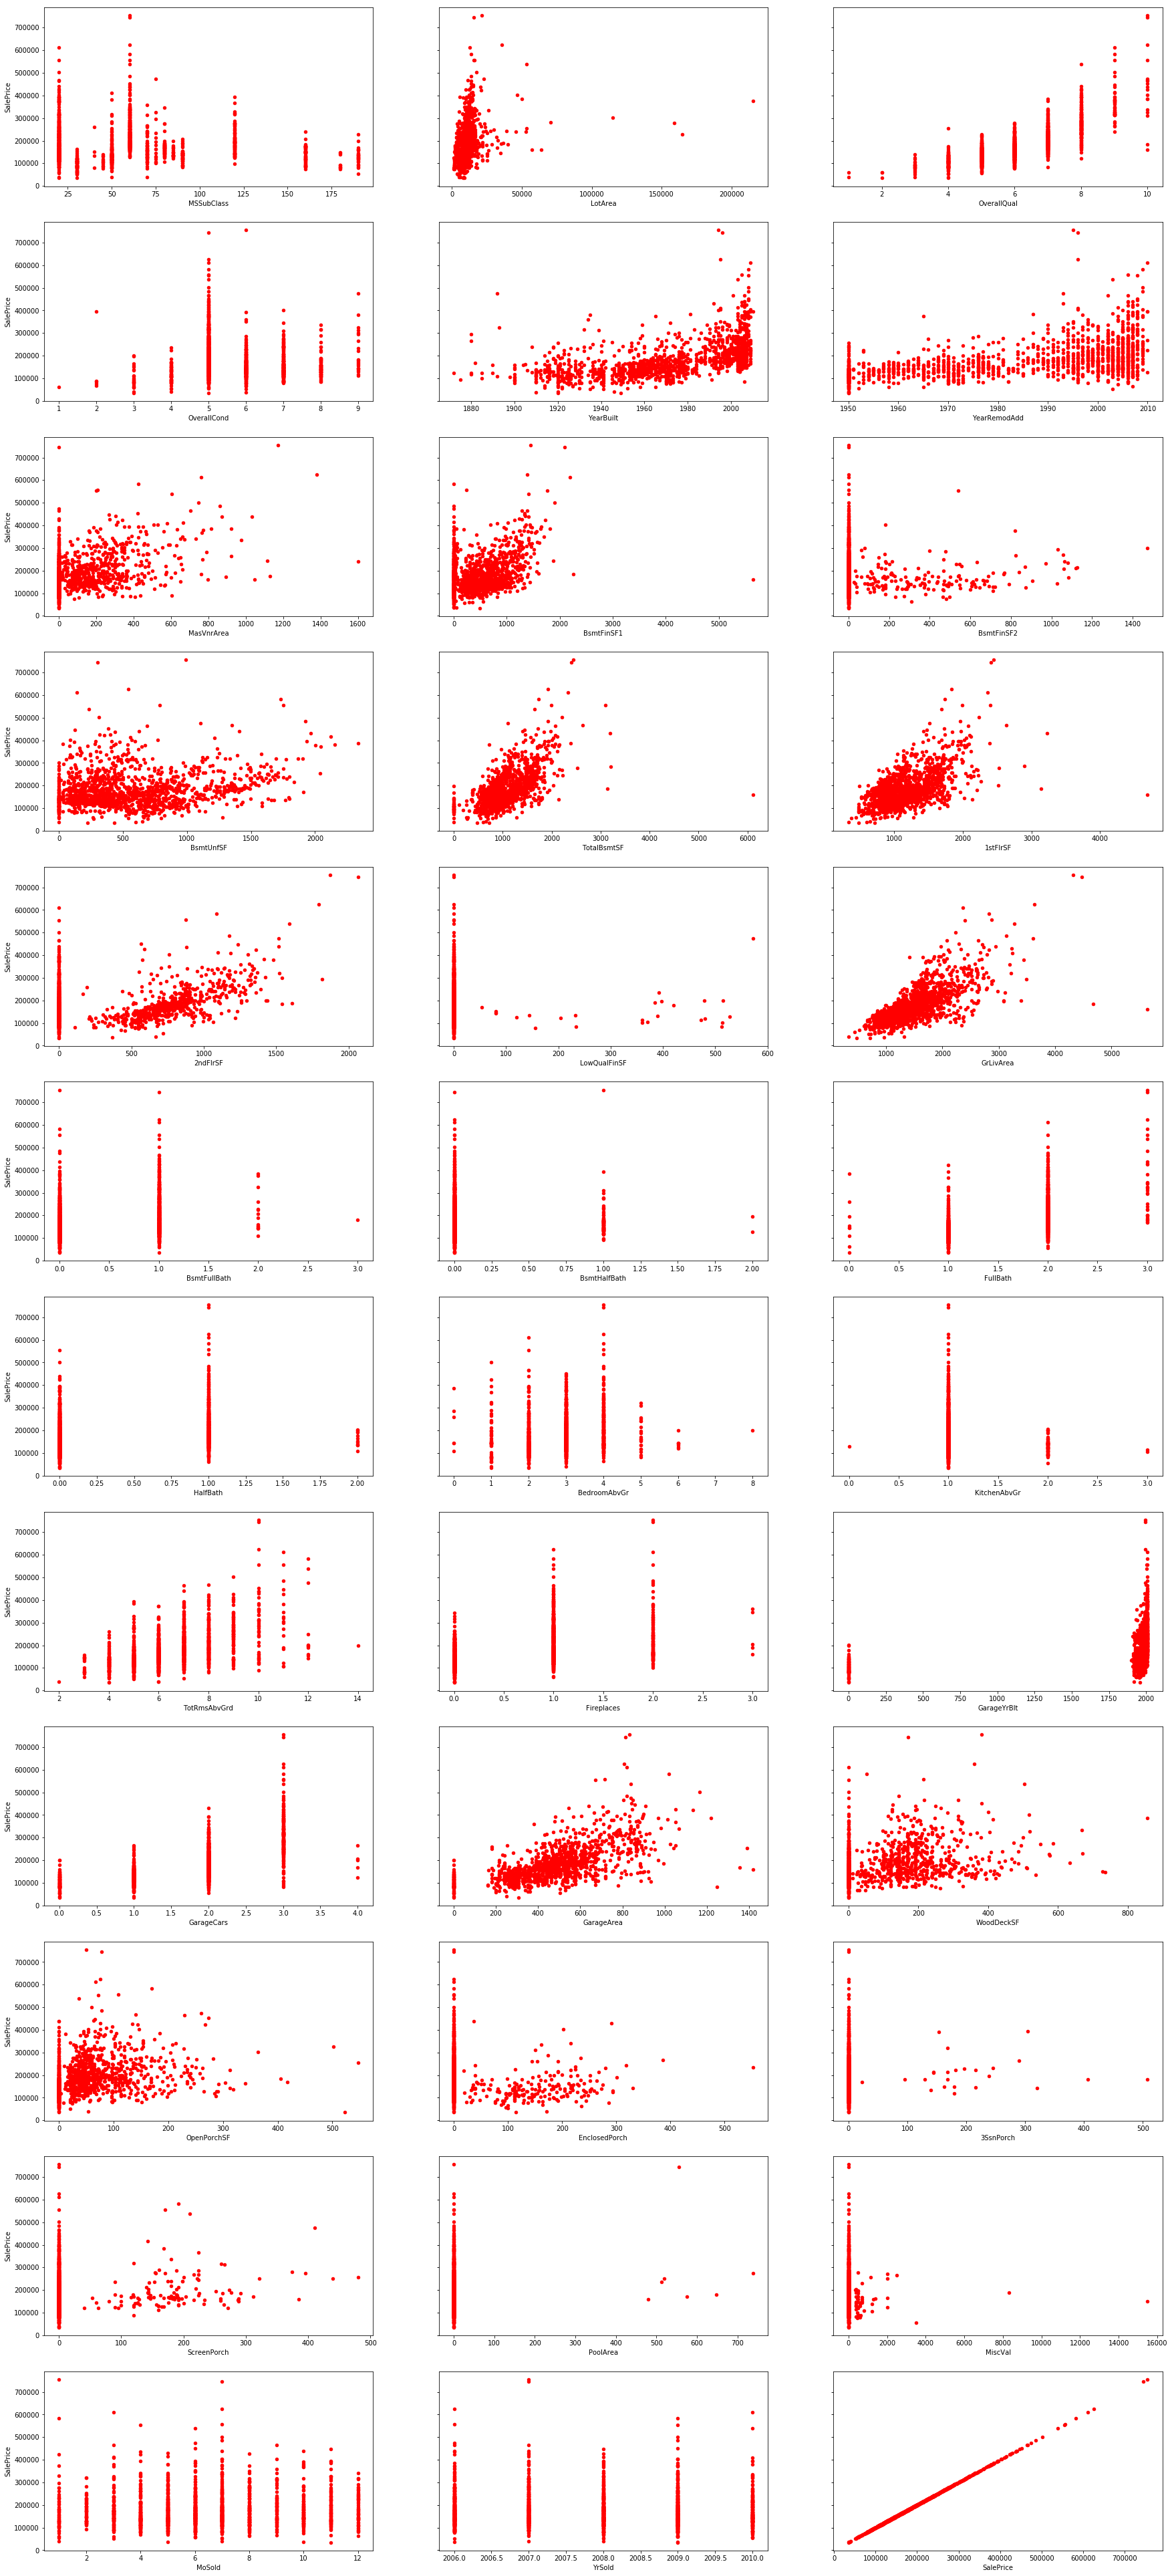

In [594]:
fig, axes = plt.subplots(ncols=3, nrows=12, figsize=(30, 70))
axes = np.ravel(axes)
for i, c in zip(range(36), numeric_features):
    train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='r')


##### GrLiving area , LotArea,TotalBsmtSF,1stFlrSF,BsmtFinSF1 has some outlier lets try to remove them and try to look again

(2919, 76)
(1445, 76)


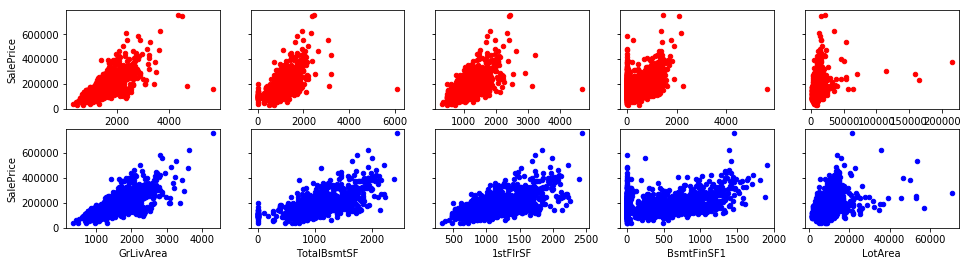

In [595]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(16, 4))
axes = np.ravel(axes)
col_name = ['GrLivArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','LotArea']
for i, c in zip(range(5), col_name):
    train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='r')

# delete outliers
print(full.shape)
train = train[train['GrLivArea'] < 4500]
train = train[train['LotArea'] < 100000]
train = train[train['TotalBsmtSF'] < 3000]
train = train[train['1stFlrSF'] < 2500]
train = train[train['BsmtFinSF1'] < 2000]

print(train.shape)

for i, c in zip(range(5,10), col_name):
    train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='b')

* Now distribution look better

#### Catagorical variable outlier
* we will have simlar approch by plotting catagorical variabe wth rspct to sle price

In [596]:
Categorical_features = []
for x in train.columns:
    if x not in numeric_features:
        Categorical_features.append(x)

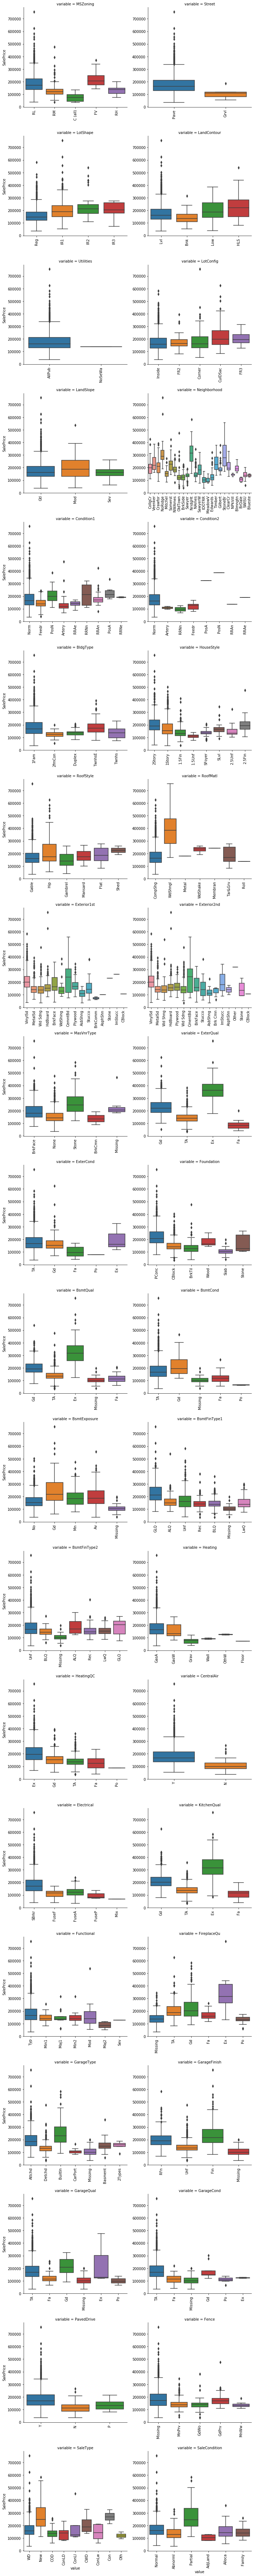

In [597]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=Categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
#train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='b')
#g=g.map(scatterplot,"value","SalePrice")
g = g.map(boxplot, "value", "SalePrice")

* Utilities and  Street does not have any information as almost all value are same so we will drop it


In [598]:

full.drop(['Utilities'],axis=1,inplace = True) 
full.drop(['Street'],axis=1,inplace = True)

train.drop(['Utilities'],axis=1,inplace = True) 
train.drop(['Street'],axis=1,inplace = True)

In [599]:
#train = full[full.SalePrice.notnull()]
test = full[full.SalePrice.isnull()]

In [600]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Data columns (total 74 columns):
MSSubClass       1445 non-null int64
MSZoning         1445 non-null object
LotArea          1445 non-null int64
LotShape         1445 non-null object
LandContour      1445 non-null object
LotConfig        1445 non-null object
LandSlope        1445 non-null object
Neighborhood     1445 non-null object
Condition1       1445 non-null object
Condition2       1445 non-null object
BldgType         1445 non-null object
HouseStyle       1445 non-null object
OverallQual      1445 non-null int64
OverallCond      1445 non-null int64
YearBuilt        1445 non-null int64
YearRemodAdd     1445 non-null int64
RoofStyle        1445 non-null object
RoofMatl         1445 non-null object
Exterior1st      1445 non-null object
Exterior2nd      1445 non-null object
MasVnrType       1445 non-null object
MasVnrArea       1445 non-null float64
ExterQual        1445 non-null object
ExterCond        1445 no